In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
norm=MinMaxScaler()
df=pd.DataFrame(norm.fit_transform(data),columns=data.columns)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [6]:
df1=df.copy()
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [7]:
x=df.drop(['TEY'],axis=1)
x
y=df1.iloc[:,7]
y

0        0.195191
1        0.195459
2        0.195325
3        0.195459
4        0.195459
           ...   
15034    0.153681
15035    0.155965
15036    0.134605
15037    0.141994
15038    0.153278
Name: TEY, Length: 15039, dtype: float64

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
model=Sequential()
model.add(Dense(units=8,input_dim=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train, epochs=150,validation_split=.4, batch_size=5)
history

Epoch 1/150
1264/1264 [==============================] - 4s 3ms/step - loss: 0.6417 - accuracy: 1.5833e-04 - val_loss: 0.6119 - val_accuracy: 0.0000e+00
Epoch 2/150
1264/1264 [==============================] - 3s 3ms/step - loss: 0.6020 - accuracy: 1.5833e-04 - val_loss: 0.5966 - val_accuracy: 0.0000e+00
Epoch 3/150
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5939 - accuracy: 1.5833e-04 - val_loss: 0.5929 - val_accuracy: 0.0000e+00
Epoch 4/150
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5920 - accuracy: 1.5833e-04 - val_loss: 0.5918 - val_accuracy: 0.0000e+00
Epoch 5/150
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5915 - accuracy: 1.5833e-04 - val_loss: 0.5915 - val_accuracy: 0.0000e+00
Epoch 6/150
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5912 - accuracy: 1.5833e-04 - val_loss: 0.5913 - val_accuracy: 0.0000e+00
Epoch 7/150
1264/1264 [==============================] - 4s 3ms/step - loss: 0.591

In [15]:
scores = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

141/141 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 2.2163e-04
accuracy: 0.02%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


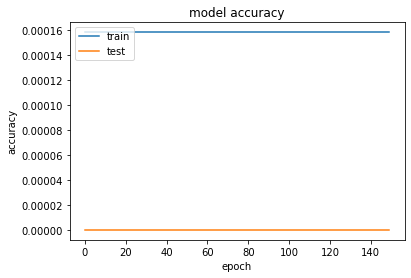

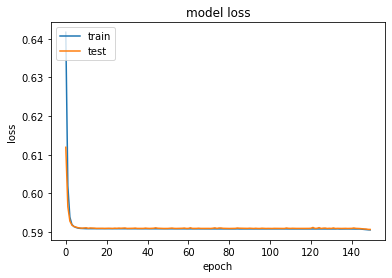

In [16]:
print(history.history.keys())
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier 
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [21]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(4, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [22]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y) 

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_14324\2428585891.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.560 total time=  18.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.631 total time=  18.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.703 total time=  19.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.599 total time=  21.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.683 total time=  19.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.560 total time= 1.6min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.631 total time= 1.5min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.581 total time= 1.5min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.599 total time= 1.4min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.581 total time= 1.4min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.559 total time= 2.8min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.631 total time= 2.8min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.579 total time= 2.8min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.601 total time= 2.9min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.581 total time= 2.9min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.560 total time=   9.6s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.631 total time=   9.8s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.580 total time=   9.3s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.600 total time=   9.5s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.581 total time=   9.5s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.560 total time=  42.4s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.631 total time=  43.3s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.580 total time=  43.8s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.599 total time=  43.1s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.686 total time=  42.9s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.559 total time= 1.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.631 total time= 1.4min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.579 total time= 1.4min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.599 total time= 1.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.581 total time= 1.4min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.559 total time=   5.2s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.631 total time=   5.2s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.580 total time=   5.3s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.692 total time=   5.2s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.582 total time=   5.2s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.559 total time=  22.2s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.631 total time=  21.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.703 total time=  22.4s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.599 total time=  21.9s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.581 total time=  21.8s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.560 total time=  43.2s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.631 total time=  43.1s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.703 total time=  43.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.692 total time=  43.8s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.581 total time= 1.8min


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.5900344371795654, using {'batch_size': 20, 'epochs': 100}
-0.6353646636009216,0.05265314575555076 with: {'batch_size': 10, 'epochs': 10}
-0.5904269456863404,0.02404825469337259 with: {'batch_size': 10, 'epochs': 50}
-0.5902631282806396,0.024243674959690042 with: {'batch_size': 10, 'epochs': 100}
-0.590476930141449,0.023991953066767296 with: {'batch_size': 20, 'epochs': 10}
-0.6110877394676208,0.04412551871645889 with: {'batch_size': 20, 'epochs': 50}
-0.5900344371795654,0.02417724027045764 with: {'batch_size': 20, 'epochs': 100}
-0.6087818622589112,0.047813760058633525 with: {'batch_size': 40, 'epochs': 10}
-0.6147927045822144,0.049947863127069565 with: {'batch_size': 40, 'epochs': 50}
-0.6333955526351929,0.057343178851758686 with: {'batch_size': 40, 'epochs': 100}


In [25]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_14324\3368580734.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.562 total time=   5.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.631 total time=   5.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.579 total time=   5.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.600 total time=   5.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.581 total time=   5.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.560 total time=   5.2s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.631 total time=   5.6s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.580 total time=   5.1s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.692 total time=   5.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.581 total time=   5.2s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.559 total time=   5.2s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.632 total time=   5.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.579 total time=   5.1s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.599 total time=   5.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.689 total time=   5.3s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.560 total time=   6.1s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.634 total time=   5.6s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.598 total time=   5.7s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.608 total time=   5.5s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.582 total time=   5.5s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.573 total time=   5.8s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.632 total time=   5.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.591 total time=   5.5s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.602 total time=   6.0s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.582 total time=   5.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.576 total time=   5.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.676 total time=   6.3s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.597 total time=   5.7s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.620 total time=   5.5s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.590 total time=   5.6s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.565 total time=   5.7s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.638 total time=   5.6s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.608 total time=   6.0s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.601 total time=   5.6s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.583 total time=   5.5s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.593 total time=   5.5s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.633 total time=   5.6s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.586 total time=   5.8s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.601 total time=   5.8s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.598 total time=   5.6s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.574 total time=   6.1s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.636 total time=   5.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.590 total time=   5.7s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.622 total time=   5.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.588 total time=   5.5s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.590678596496582, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.590678596496582,0.023523200234344763 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.6086767077445984,0.04775997264450015 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.6119598865509033,0.04557269031482518 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.5965331792831421,0.02482255639061994 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.5959101796150208,0.02036172735343876 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.6117653250694275,0.03514524535605255 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.5989314675331116,0.02455057101870514 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.602185595035553,0.016060699399884356 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.6019897818565368,0.023029223237699653 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [27]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_14324\894575581.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.572 total time=   6.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.635 total time=   6.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.597 total time=   7.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.608 total time=   5.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.588 total time=   6.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=-0.574 total time=   5.8s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=-0.635 total time=   5.8s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=-0.594 total time=   5.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=-0.606 total time=   5.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=-0.589 total time=   5.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=-0.579 total time=   6.3s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=-0.634 total time=   5.8s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=-0.591 total time=   5.8s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=-0.605 total time=   6.0s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=-0.590 total time=   6.1s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=-0.560 total time=   5.5s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=-0.631 total time=   5.5s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=-0.593 total time=   5.6s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=-0.600 total time=   6.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=-0.583 total time=   5.6s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=-0.561 total time=   5.7s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=-0.631 total time=   5.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=-0.581 total time=   5.5s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=-0.603 total time=   5.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=-0.685 total time=   5.7s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=-0.694 total time=   5.6s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=-0.683 total time=   6.0s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=-0.703 total time=   5.6s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=-0.692 total time=   5.6s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=-0.685 total time=   5.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.560 total time=   5.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.632 total time=   5.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.581 total time=   5.6s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.600 total time=   5.5s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=-0.582 total time=   6.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=-0.560 total time=   5.6s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=-0.632 total time=   5.6s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=-0.581 total time=   5.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=-0.600 total time=   5.6s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=-0.582 total time=   5.7s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=-0.694 total time=   5.5s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=-0.684 total time=   5.6s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=-0.702 total time=   6.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=-0.692 total time=   5.5s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=-0.686 total time=   5.5s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=-0.560 total time=   5.6s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=-0.631 total time=   5.7s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=-0.580 total time=   6.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=-0.600 total time=   5.7s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=-0.581 total time=   5.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=-0.560 total time=   6.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=-0.632 total time=   5.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=-0.580 total time=   5.5s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=-0.600 total time=   5.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=-0.582 total time=   5.5s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=-0.695 total time=   5.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=-0.686 total time=   5.6s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=-0.704 total time=   5.5s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=-0.692 total time=   6.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=-0.685 total time=   5.5s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.5905206322669982, using {'activation_function': 'linear', 'init': 'uniform'}
-0.599799120426178,0.02103677617884305 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.5995511770248413,0.020514597176314226 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.5998324155807495,0.01904993068576435 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.5934716463088989,0.0231742152644188 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.6122238636016846,0.043241299322061555 with: {'activation_function': 'relu', 'init': 'normal'}
-0.6913430690765381,0.007013728720257074 with: {'activation_function': 'relu', 'init': 'zero'}
-0.5909232854843139,0.023958511528016774 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.5910317540168762,0.024082722478825654 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.6916058182716369,0.006571727194810788 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.5905206322669982,0.02403011838479777

In [29]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y) 


C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_14324\2979268643.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.563 total time=   5.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.633 total time=   5.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.582 total time=   5.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.601 total time=   5.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.583 total time=   5.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.562 total time=   5.5s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.633 total time=   6.0s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.581 total time=   5.5s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.600 total time=   5.6s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END ........neuron1=4, neuron2=4;, score=-0.582 total time=   5.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.561 total time=   5.6s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.632 total time=   5.8s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.580 total time=   5.7s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.600 total time=   6.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END ........neuron1=4, neuron2=8;, score=-0.582 total time=   5.7s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.562 total time=   5.6s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.632 total time=   5.6s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.582 total time=   5.5s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.601 total time=   5.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END ........neuron1=8, neuron2=2;, score=-0.582 total time=   5.6s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.561 total time=   5.5s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.632 total time=   5.6s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.581 total time=   6.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.600 total time=   5.5s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END ........neuron1=8, neuron2=4;, score=-0.582 total time=   5.6s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.560 total time=   5.8s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.632 total time=   5.6s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.580 total time=   5.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.600 total time=   5.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END ........neuron1=8, neuron2=8;, score=-0.582 total time=   5.5s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.561 total time=   6.0s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.632 total time=   5.6s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.581 total time=   5.6s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.600 total time=   5.7s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END .......neuron1=16, neuron2=2;, score=-0.583 total time=   5.5s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.561 total time=   5.7s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.632 total time=   5.6s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.581 total time=   5.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.600 total time=   6.0s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END .......neuron1=16, neuron2=4;, score=-0.582 total time=   5.5s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.560 total time=   5.7s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.632 total time=   5.6s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.580 total time=   6.3s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.600 total time=   5.6s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END .......neuron1=16, neuron2=8;, score=-0.582 total time=   5.6s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.5907216906547547, using {'neuron1': 16, 'neuron2': 8}
-0.5921965956687927,0.02368293408936023 with: {'neuron1': 4, 'neuron2': 2}
-0.5915223240852356,0.02397769240644888 with: {'neuron1': 4, 'neuron2': 4}
-0.59102463722229,0.024165669030962286 with: {'neuron1': 4, 'neuron2': 8}
-0.5918548941612244,0.023690913601434587 with: {'neuron1': 8, 'neuron2': 2}
-0.5912923574447632,0.02402482520870435 with: {'neuron1': 8, 'neuron2': 4}
-0.5907546997070312,0.024002880062622065 with: {'neuron1': 8, 'neuron2': 8}
-0.5914058566093445,0.023706618205173207 with: {'neuron1': 16, 'neuron2': 2}
-0.5909877061843872,0.02390427619937624 with: {'neuron1': 16, 'neuron2': 4}
-0.5907216906547547,0.023996918848689708 with: {'neuron1': 16, 'neuron2': 8}


In [32]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 7,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Fitting the model

model.fit(x,y)

# Predicting using trained model

y_predict = model.predict(x)

y_predict

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_14324\132940977.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


array([0.2032489 , 0.2045266 , 0.20574749, ..., 0.13120046, 0.1435272 ,
       0.16192807], dtype=float32)

In [36]:
rmse_value = np.sqrt(np.mean((y_predict-y)**2))
rmse_value

0.01572672559348416